In [1]:
#Ë∑ØÂæÑÁÆ°ÁêÜ/ÂÖ®Â±ÄÂèòÈáè
import os
import sys

# ËÆæÁΩÆ‰∏∫È°πÁõÆÊ†πÁõÆÂΩïÔºàÂåÖÂê´ data, pipline Á≠âÊñá‰ª∂Â§πÁöÑÁõÆÂΩïÔºâ
project_root = os.path.abspath("..")
os.chdir(project_root)
sys.path.append(project_root)
from utils.config import KEYWORDS
from utils.path_helper import get_data_path

#Âü∫Á°ÄÊ®°Âùó
import numpy as np
import pandas as pd

#Ê∏ÖÊ¥óÂáΩÊï∞ÔºåÁâπÂæÅÂ∑•Á®ãÂáΩÊï∞ÂØºÂÖ•
from pipline.pipline import pipeline_house_data
from features_wlh.features_wlh import add_selected_features

#ÂØºÂÖ•ËÆ≠ÁªÉÂáΩÊï∞
from model.train_model import train_model
#ÈÄâÊã©ËÆ≠ÁªÉÂáΩÊï∞ÔºåËá™Â∑±ÂéªË∞ÉÊï¥
from sklearn.ensemble import RandomForestRegressor
#ËÆ≠ÁªÉÈõÜÂàíÂàÜ(Â∑≤ÁªèÂú®train_modelÈáåÈù¢ÂÅöËøá,ÂØºÂÖ•Âè™ÊòØÂëäËØâ‰Ω†Â∑≤ÁªèÂÅöÂÆå‰∫Ü)
from sklearn.model_selection import train_test_split
#ÁâπÂæÅÂÄºÁõ∏ÂÖ≥ÊÄßÊ£ÄÈ™å,ÂÖ±Á∫øÊÄßÊ£ÄÈ™å
from features_wlh.feature_analysis import plot_feature_correlation
from features_wlh.feature_vif_validation import check_multicollinearity
#ËØÑ‰º∞
from model.evaluate import evaluate_model

In [2]:
# ËØªÂèñÊï∞ÊçÆ
df = pd.read_csv(get_data_path("house_prices.csv"))
# Ê∏ÖÊ¥óÊï∞ÊçÆ
df_cleaned = pipeline_house_data(df, keywords=KEYWORDS)

Fundenmental Analysis

Analysis with picture and Visualization

Project  of Features and Validation

In [4]:
My_features = ["Furnishing_giving","floor_level_normalize","has_amenities",
"has_green_space","has_proximity","is_affordable","is_basement","is_deal","is_gated",
"is_ground","is_luxury","is_marketing_strong","is_new","is_prime_location","is_resale",
"is_spacious","is_well_planned","location_rank",
"normal_Carpet_Area",
"ownership_score"] #‰∏Ä‰∏™Á§∫‰æãÔºåËÆ≠ÁªÉÁöÑÊó∂ÂÄôÊ†πÊçÆÁâπÂæÅÂàÜÊûêËá™Â∑±ÂéªÈÄâ

df_cleaned_features = add_selected_features(df_cleaned, features_to_use = My_features)

c:\Users\K.Hawk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


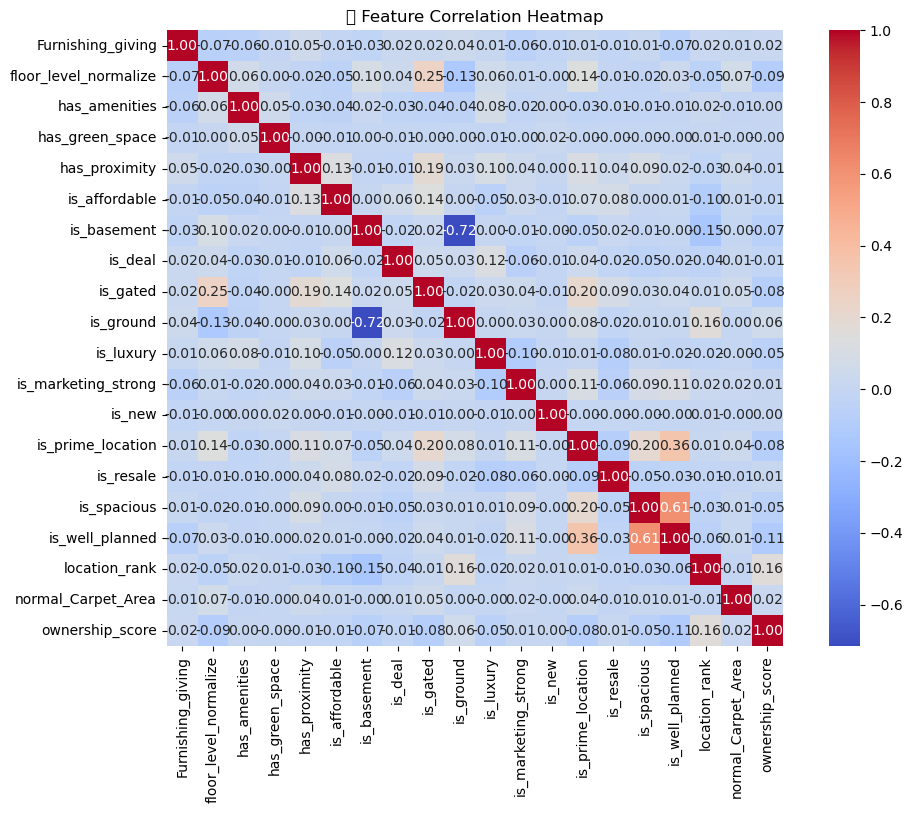

‚úÖ Ê≤°ÊúâÊ£ÄÊµãÂà∞È´òÂ∫¶Áõ∏ÂÖ≥ÁöÑÁâπÂæÅÂØπ„ÄÇ


c:\Users\K.Hawk\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


üß™ ÊñπÂ∑ÆËÜ®ËÉÄÂõ†Â≠êÔºàVIFÔºâÊ£ÄÊµãÁªìÊûúÔºö
                  feature           VIF
0                   const  9.007199e+15
3             Carpet Area           inf
17       location_encoded  3.336273e+01
19              max_floor  3.002400e+15
31  floor_level_normalize           inf
32          location_rank  5.201703e+01
33         location_level  3.444260e+01
34     normal_Carpet_Area           inf


In [5]:
plot_feature_correlation(df_cleaned_features, features = My_features, threshold=0.85)
vif_result = check_multicollinearity(df_cleaned_features, threshold=5)

Train Model (Âéªtrain_model.pyÈáåÈù¢Ë∞ÉÊï¥ÂèÇÊï∞,Ë∞ÉÊï¥Ê®°ÂûãÈÄâÊã©Ôºånotebook‰ªÖÁî®‰∫é‰ΩøÁî®gridÊâæÂèÇÊï∞)

In [6]:
after_trained_model, X_test, y_test = train_model(df_cleaned_features, df_cleaned, features_to_use = My_features) 

‚úÖ Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàêÔºå‰øùÂ≠òÂà∞Ôºö models_saved/rf_model.pkl


Evaulate Model & Parameter optimization

In [7]:
evaluate_model(after_trained_model, X_test, y_test)



MAE: 1812528.37
RMSE: 75696493.78
R¬≤ Score: 0.0187


{'MAE': 1812528.3714058434,
 'RMSE': 75696493.77942784,
 'R2': 0.01872977690634181}